# What drives the price of a used car?

## Questions Asked

Questions for this exercise appeared in the following quasi-random permutations
- What drives the price of a used car?
    - What do consumers value in a used car?
    - Understand what factors make a car more or less expensive
    - We are tasked with identifying key drivers for used car prices
- Used-car dealers are interested in fine-tuning their inventory

The above can be summarized into 2 categories
- What we want to know
    - What attributes of a car determine its price
- Why we want to know it
    - Dealers want to *fine tune* their inventory
        - But what does fine tune their inventory mean?
        - Fine tune it for.. what?

## Overview

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## Deliverables

After understanding, preparing, and modeling your data, write up a basic report that details your primary findings. Your audience for this report is a group of used car dealers interested in fine-tuning their inventory.

## Grading

**Modeling**
- Use of multiple regression models
- Cross-validation of models
- Grid search hyperparameters
- Appropriate interpretation of coefficients in models
- Appropriate interpretation of evaluation metric
- Clear identification of evaluation metric
- Clear rationale for use of given evaluation metric

**Findings**
- Clearly stated business understanding of problem
- Clean and organized notebook with data cleaning
- Correct and concise interpretation of descriptive and inferential statistics
- Clearly stated findings in their own section with actionable items highlighted in appropriate language for a non-technical audience
- Next steps and recommendations

## The CRISP-DM Framework

### Intro and Diagram

To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

<center>
    <img src = images/crisp.png width = 35%/>
</center>

### CRISP-DM Tasks

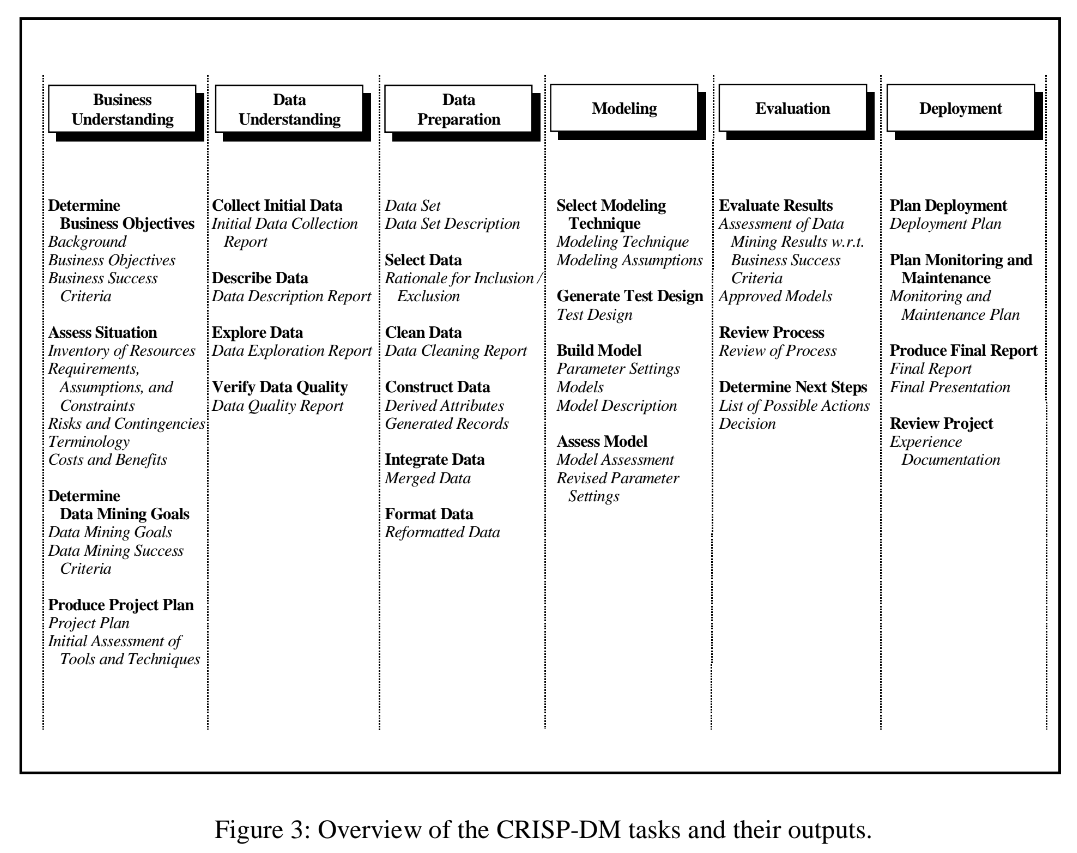

# Imports

In [54]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from itertools import cycle, islice

import seaborn as sns

In [36]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True})
sns.set()

# Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

>This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary project plan designed to achieve the objectives.

## Business Objective

The business objective is to ultimately to run a more profitable used-car dealership
- To do so, they want to know what vehicles they should acquire at auction
- And what they should price them at

## Resource Inventory

The resource inventory is
- A data set from Kaggle containing hundreds of thousands of records of prior car sales

## Data Mining Goals

The data mining goals are
- To determine what features matter when predicting car price
- To select a minimal set which achieves a stated level of accuracy
- To choose a model that when operated against these features is accurate at predicting car prices

## Success Criteria

The success criteria are
- Given a set of features, predict the car price on average within **10%**
    - The error is assessed against the mean absolute error (MAE)
    - Over a chosen test set

# Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

>The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information. There is a close link between Business Understanding and Data Understanding. The formulation of the data mining problem and the project plan require at least some understanding of the available data.

## Expected Steps

To get to know the data set, and identify any quality issues with it, I anticipate performing the following steps
- Load the data in and display the first few records
- Check for missing or invalid data
- Make plots of individual features and pair plots to understand what correlates with the target feature
- This step could drive the business understanding and help me refine the business objectives
- Does a dealer want to know...
    - How much to pay for a car?
    - How much to price a car for?
    - What cars to buy and what to skip?
    - Given a customer, what car to pitch to that customer?
- I hope after viewing the data I can better understand what is desired and possible

## Data Collection and Description

The collection is a given as it was provided. The data consists of about 425,00 records, each record describes
- Where the car sale was
- For what price it sold
- The vehicle identification number (VIN)
- The year, condition, and mileage of the car
- The make and model

## Data Exploration

- Display some rows
- Check for nulls
- Make some plots
- What correlates with price?

In [83]:
vehicle_file_cropped = "./data/vehicles_no_nulls.csv"
if 0:
    # Read full data set and save a cropped version - no nans
    df = pd.read_csv("./data/vehicles.csv")
    df = df.dropna()
    df.to_csv(vehicle_file_cropped, index=False)
else:
    # Read back the smaller table
    df = pd.read_csv(vehicle_file_cropped)

In [84]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
1,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
2,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
3,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
4,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34868 entries, 0 to 34867
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    34868 non-null  int64  
 1   id            34868 non-null  int64  
 2   region        34868 non-null  object 
 3   price         34868 non-null  int64  
 4   year          34868 non-null  float64
 5   manufacturer  34868 non-null  object 
 6   model         34868 non-null  object 
 7   condition     34868 non-null  object 
 8   cylinders     34868 non-null  object 
 9   fuel          34868 non-null  object 
 10  odometer      34868 non-null  float64
 11  title_status  34868 non-null  object 
 12  transmission  34868 non-null  object 
 13  VIN           34868 non-null  object 
 14  drive         34868 non-null  object 
 15  size          34868 non-null  object 
 16  type          34868 non-null  object 
 17  paint_color   34868 non-null  object 
 18  state         34868 non-nu

In [49]:
df.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
1,127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
2,128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
3,215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
4,219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


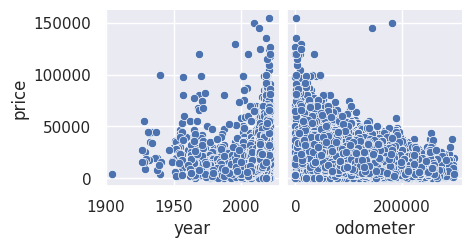

In [72]:
x_vars = ["year", "odometer"]
y_vars = ["price"]
sns.pairplot(df.query("odometer < 300_000"), x_vars=x_vars, y_vars=y_vars)

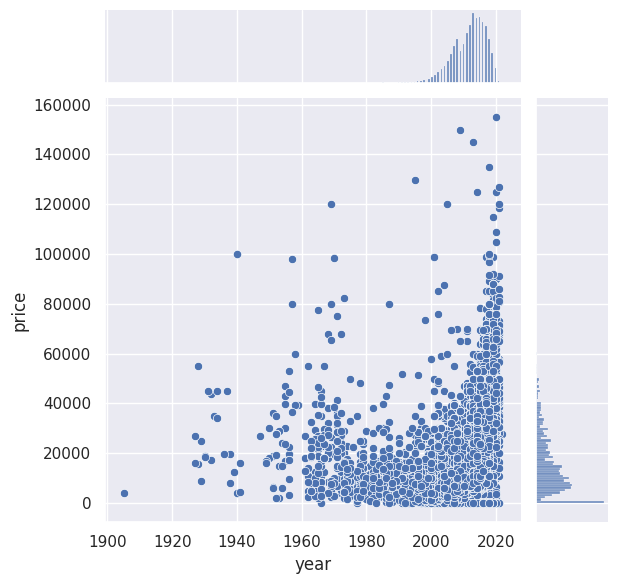

In [73]:
sns.jointplot(df, x="year", y="price")

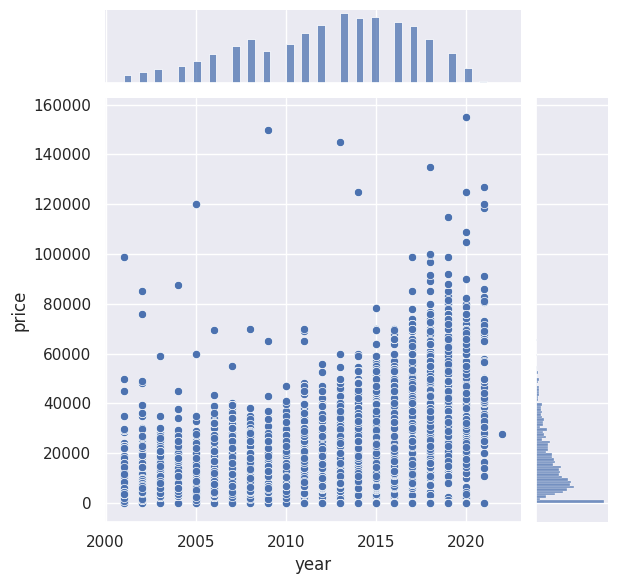

In [64]:
sns.jointplot(df.query("year > 2000"), x="year", y="price")

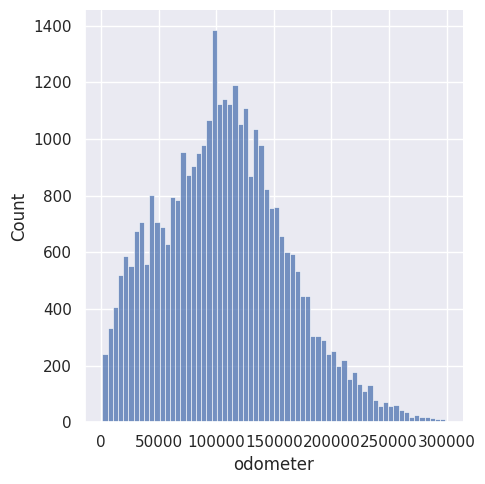

In [71]:
sns.displot(df[(df["odometer"] > 1000) & (df["odometer"] < 300_000)], x="odometer")

In [58]:
df["odometer"].describe()

count    3.486800e+04
mean     1.073991e+05
std      9.990878e+04
min      0.000000e+00
25%      6.516400e+04
50%      1.040000e+05
75%      1.411678e+05
max      9.999999e+06
Name: odometer, dtype: float64

In [50]:
df.value_counts()

Unnamed: 0  id          region     price  year    manufacturer  model               condition  cylinders    fuel    odometer  title_status  transmission  VIN                drive  size         type         paint_color  state
126         7305672709  auburn     0      2018.0  chevrolet     express cargo van   like new   6 cylinders  gas     68472.0   clean         automatic     1GCWGAFP8J1309579  rwd    full-size    van          white        al       1
280113      7303662021  rochester  18995  2013.0  ford          f250 super duty     like new   8 cylinders  gas     133494.0  clean         automatic     1FTBF2B66DEA11792  4wd    full-size    truck        black        ny       1
279966      7304447506  rochester  20995  2014.0  jeep          wrangler sport      excellent  6 cylinders  gas     64500.0   clean         manual        1C4AJWAG9EL212403  4wd    compact      SUV          grey         ny       1
279967      7304443076  rochester  18995  2016.0  mazda         cx-3 grand touring  e

In [55]:
def unique_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    return df.apply(
        lambda x: list(islice(cycle(x.unique()), df.nunique(dropna=False).max()))
    )

In [56]:
unique_dataframe(df).tail(5)

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
34863,426788,7303227528,southwest VA,37988,1962.0,honda,e350 sd extended cargo van,good,12 cylinders,other,160000.0,lien,automatic,1D7KS28C07J508931,rwd,sub-compact,mini-van,red,nj
34864,426792,7303114896,winchester,62999,1933.0,ram,e350 sd ext cargo van,new,6 cylinders,electric,152925.0,missing,manual,1FMJU1JT8FEF31056,fwd,full-size,offroad,grey,nm
34865,426793,7303112347,bellingham,22488,1961.0,hyundai,accord sedan ex,salvage,4 cylinders,gas,98900.0,parts only,other,1GKS2EEFXCR278017,4wd,compact,bus,black,ny
34866,426833,7302338378,kennewick-pasco-richland,32129,1988.0,fiat,odyssey xlt,like new,8 cylinders,hybrid,125817.0,clean,automatic,1GCVKREC4FZ253477,rwd,mid-size,van,brown,nh
34867,426836,7302301268,moses lake,18758,1928.0,cadillac,seville sls,excellent,5 cylinders,diesel,112538.0,rebuilt,manual,1FMCU0F60LUA25082,fwd,sub-compact,sedan,green,nd


In [40]:
def sns_histplot(data: pd.DataFrame, x: str = ""):
    sns.histplot(
        data=data,
        x=x,
        kde=True,
        palette=sns.color_palette("bright")[:3],
    )

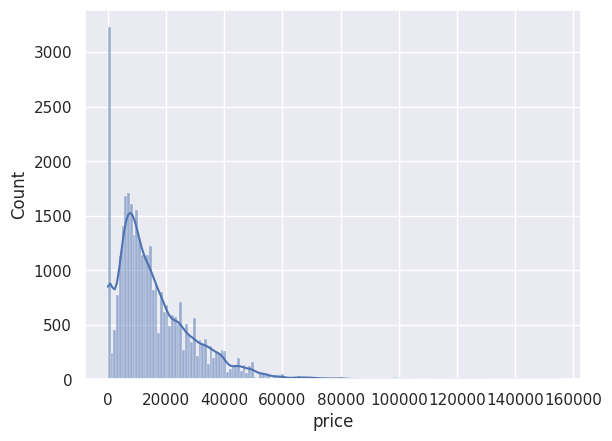

In [41]:
sns_histplot(df, x="price")

In [42]:
df[["price"]].describe()

,price
count,34868.000000
mean,15837.446771
std,13460.056823
min,0.000000
25%,6500.000000
50%,12000.000000
75%,22003.500000
max,155000.000000


In [43]:
np.sum(df["price"] == 0)

2372

In [44]:
np.sum(df["price"] > 50000)

669

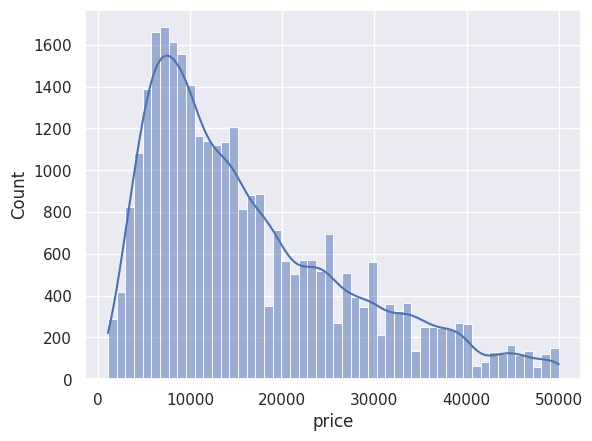

In [45]:
sns_histplot(df.query("price > 1000 and price < 50000"), x="price")

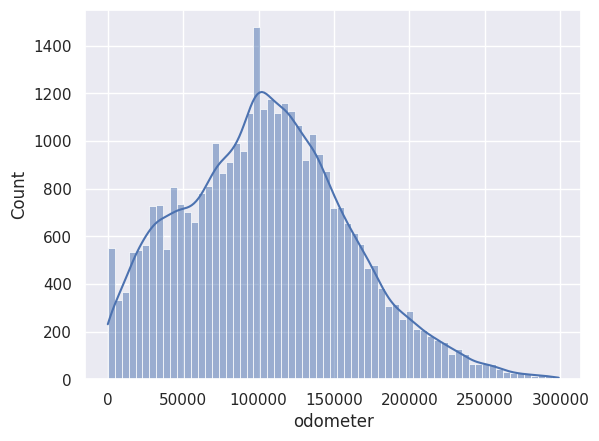

In [78]:
sns_histplot(df.query("odometer < 300_000"), x="odometer")

## Verify Data Quality

Not sure what is intended here. We are taking this data set as a given and truth.

# Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.  

>The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tool(s)) from the initial raw data. Data preparation tasks are likely to be performed multiple times, and not in any prescribed order. Tasks include table, record, and attribute selection, data cleaning, construction of new attributes, and transformation of data for modeling tools.

## Cleaning / Dropping / Deleting

Checking for nulls and dropping them

In [46]:
df = df.query("price > 1000 and price < 50000")

## Feature Development

Poly features, one hot, ordinals possibly

## Data Transformations

Scaling, logs, normalizing

# Modeling

With your almost final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.  

>In this phase, various modeling techniques are selected and applied, and their parameters are calibrated to optimal values. Typically, there are several techniques for the same data mining problem type. Some techniques require specific data formats. There is a close link between Data Preparation and Modeling. Often, one realizes data problems while modeling or one gets ideas for constructing new data.

## Train / Test Split

## Model 1

- Choose the model type
- Hyperparameters with cross validation
- Predictions and analysis

## Model 1

- Choose the model type
- Hyperparameters with cross validation
- Predictions and analysis

# Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

>At this stage in the project you have built one or more models that appear to have high quality, from a data analysis perspective. Before proceeding to final deployment of the model, it is important to more thoroughly evaluate the model, and review the steps executed to construct the model, to be certain it properly achieves the business objectives. A key objective is to determine if there is some important business issue that has not been sufficiently considered. At the end of this phase, a decision on the use of the data mining results should be reached.

# Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

>Creation of the model is generally not the end of the project. Usually, the knowledge gained will need to be organized and presented in a way that the customer can use it. Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data mining process. In many cases it will be the user, not the data analyst, who will carry out the deployment steps. In any case, it is important to understand up front what actions will need to be carried out in order to actually make use of the created models.